# 数据科学基础第十章作业

刘昕雅 2016200701

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random 

# 1.父母身高和子女身高是否存在联系

In [2]:
# 导入数据
gg=pd.read_csv("GaltonFamilies.csv")
#将身高转化为厘米
gg["ch"]=gg["childHeight"]*2.54
gg["ph"]=gg["midparentHeight"]*2.54
gg.describe()

,father,mother,midparentHeight,children,childNum,childHeight,ch,ph
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,69.197109,64.089293,69.206773,6.171306,3.585653,66.745931,169.534666,175.785203
std,2.476479,2.290886,1.802370,2.729025,2.361410,3.579251,9.091298,4.578020
min,62.000000,58.000000,64.400000,1.000000,1.000000,56.000000,142.240000,163.576000
25%,68.000000,63.000000,68.140000,4.000000,2.000000,64.000000,162.560000,173.075600
50%,69.000000,64.000000,69.248000,6.000000,3.000000,66.500000,168.910000,175.889920
75%,71.000000,65.875000,70.140000,8.000000,5.000000,69.700000,177.038000,178.155600
max,78.500000,70.500000,75.430000,15.000000,15.000000,79.000000,200.660000,191.592200


In [3]:
#总样本
ch1=list(gg.ch)
bins=[141,151,161,171,181,191,201]
ch_total=pd.cut(ch1,bins)
ch_total.value_counts()

(141, 151]      6
(151, 161]    176
(161, 171]    349
(171, 181]    307
(181, 191]     92
(191, 201]      4
dtype: int64

In [4]:
#父母平均身高大于180的样本
ch_p=list(gg[gg.ph>180].ch)
bins=[141,151,161,171,181,191,201]
ch_part=pd.cut(ch_p,bins)
ch_part.value_counts()

(141, 151]     0
(151, 161]     8
(161, 171]    55
(171, 181]    53
(181, 191]    30
(191, 201]     3
dtype: int64

In [5]:
#构成dataframne
ch=pd.DataFrame({"height":["141-151","151-161","161-171",
                           "171-181","181-191","191-201"],
                   "ch_total":[6,176,349,307,92,4],
                  "ch_part":[0,8,55,53,30,3]},
                 columns=["height","ch_total","ch_part"])
ch.ch_total=ch.ch_total/943
ch.ch_part=ch.ch_part/sum(ch.ch_part)
ch

,height,ch_total,ch_part
0,141-151,0.006363,0.000000
1,151-161,0.186638,0.053691
2,161-171,0.370095,0.369128
3,171-181,0.325557,0.355705
4,181-191,0.097561,0.201342
5,191-201,0.004242,0.020134


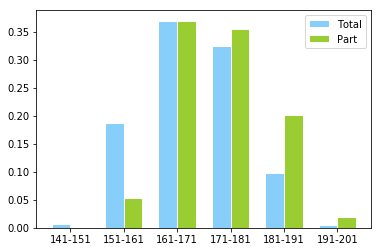

In [6]:
#绘制pin概率差距图
x=np.arange(6)+1
width=0.35
plt.bar(x-0.5*width,ch.ch_total,width=width,facecolor="lightskyblue",edgecolor="white")
plt.bar(x+0.5*width,ch.ch_part,width=width,facecolor="yellowgreen",edgecolor="white")
plt.xticks(x,ch.height)
plt.legend(["Total","Part"])
plt.show()

In [7]:
#计算变异系数
#定义求变异距离的函数
def total_variation_distance(distribution_1,distribution_2):
    return np.abs(distribution_1-distribution_2).sum()/2
def table_tvd(table,label1,label2):
    return total_variation_distance(table[label1],table[label2])
table_tvd(ch,"ch_total","ch_part")

0.1450497128256955

In [8]:
#从总样本随机抽样sum(ch.ch_part)个，观察总样本中随机抽样情况，
import random
#随机抽样函数
def randomPick(some_list,probabilities):
    "以制定的概率从列表中随机获取元素probabilitiess list"
    x=random.uniform(0,1)
    cumulativeProbability = 0.0
    #链接变量的循环范围
    for item, iterProbability in zip(some_list,probabilities):
        cumulativeProbability +=iterProbability
        if x< cumulativeProbability:
            break
    return item
def proportions_from_distribution(table,element_label,probability_label,size):
    #有放回抽样
    n=0
    randomSample=[]
    while n<size:
        randomSample.append(randomPick(table[element_label],table[probability_label]))
        n+=1
    return randomSample

In [10]:
size=149
randomSample=proportions_from_distribution(ch,"height","ch_total",size)
#用np.unique进行总结
value,sampleProportion=np.unique(randomSample,return_counts=True)
value,np.divide(sampleProportion,size)

(array(['141-151', '151-161', '161-171', '171-181', '181-191', '191-201'],
       dtype='<U7'),
 array([0.00671141, 0.18791946, 0.36912752, 0.32885906, 0.08724832,
        0.02013423]))

In [11]:
ch["Random"]=np.divide(sampleProportion,size)
ch

,height,ch_total,ch_part,Random
0,141-151,0.006363,0.000000,0.006711
1,151-161,0.186638,0.053691,0.187919
2,161-171,0.370095,0.369128,0.369128
3,171-181,0.325557,0.355705,0.328859
4,181-191,0.097561,0.201342,0.087248
5,191-201,0.004242,0.020134,0.020134


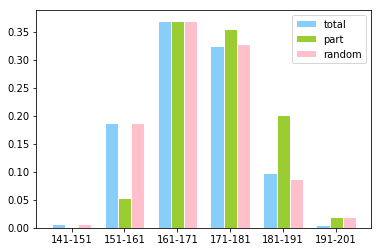

In [12]:
#绘制
x=np.arange(6)+1
width=0.25
plt.bar(x-width,ch.ch_total,width=width,facecolor="lightskyblue",edgecolor="white")
plt.bar(x+0*width,ch.ch_part,width=width,facecolor="yellowgreen",edgecolor="white")
plt.bar(x+1*width,ch.Random,width=width,facecolor="pink",edgecolor="white")
#设置名称
plt.xticks(x,ch.height)
plt.legend(["total","part","random"])
plt.show()

In [13]:
可以看出随机抽样的身高分布和总样本身高分布差距不大，
但和父母身高高于180的子女身高分布差距很大

SyntaxError: invalid character in identifier (<ipython-input-13-4056c9ff0a85>, line 1)

In [17]:
size=1000
tvds=[]
repetitions=500
for i in np.arange(repetitions):
    randomSample=proportions_from_distribution(ch,"height","ch_total",size)
    value,sampleProportion=np.unique(randomSample,return_counts=True )
    tvds=np.append(tvds,np.sum(np.abs(np.divide(sampleProportion,size)-ch["ch_total"])/2))

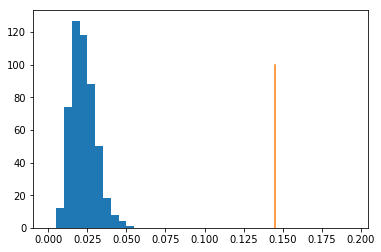

In [105]:
#画分布图
plt.hist(tvds,bins=np.arange(0,0.2,0.005))
plt.plot([0.145,0.145],[0.145,100])
plt.show()

# 2. 不同年龄段对三类节目的关注率

In [109]:
TV=pd.DataFrame({"年龄段":["<30","30-50",">50"],
                   "体育类":[83,91,41],
                  "综艺类":[70,86,38],
                  "影视剧类":[45,15,10]},
                 columns=["年龄段","体育类","综艺类","影视剧类"])
TV

,年龄段,体育类,综艺类,影视剧类
0,<30,83,70,45
1,30-50,91,86,15
2,>50,41,38,10


In [114]:
#齐性检验
x=TV.set_index("年龄段")
chi2,p,df,exp=stats.chi2_contingency(x)
print("Person Chi2: \n p-value={},df={}".format(p,df))

Person Chi2: 
 p-value=0.0009203281225871962,df=4


In [ ]:
p值为0.00092，于是拒绝原假设，
不同年龄段的观众对三类节目关注率不同。

# 1.陪审团种族歧视问题

## 1.1绘制情况

In [66]:
#绘制陪审团种族情况和总人口种族情况
jury=pd.DataFrame({"Ethnicity":["Asian","Black","Latino","White","Other"],
                   "Eligible":[0.15,0.18,0.12,0.54,0.01],
                  "Panels":[0.26,0.08,0.08,0.54,0.04]},
                 columns=["Ethnicity","Eligible","Panels"])
jury

,Ethnicity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


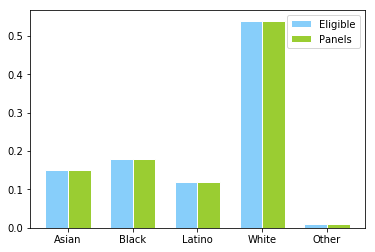

In [67]:
x=np.arange(5)+1
width=0.35
#eligible
plt.bar(x-0.5*width,jury.Eligible,width=width,facecolor="lightskyblue",edgecolor="white")
#panel
plt.bar(x+0.5*width,jury.Eligible,width=width,facecolor="yellowgreen",edgecolor="white")
#设置名称
plt.xticks(x,jury.Ethnicity)
plt.legend(["Eligible","Panels"])
plt.show()

## 1.2刻画两个分布之间的距离-变异距离

In [68]:
#计算两组比例的差
jury["Dif"]=jury.Panels-jury.Eligible
#计算绝对值
jury["Abs.Dif"]=abs(jury.Dif)
jury

,Ethnicity,Eligible,Panels,Dif,Abs.Dif
0,Asian,0.15,0.26,0.11,0.11
1,Black,0.18,0.08,-0.10,0.10
2,Latino,0.12,0.08,-0.04,0.04
3,White,0.54,0.54,0.00,0.00
4,Other,0.01,0.04,0.03,0.03


In [69]:
#将差的绝对值求和除以2
jury["Abs.Dif"].sum()/2

0.14

In [70]:
#定义求变异距离的函数
def total_variation_distance(distribution_1,distribution_2):
    return np.abs(distribution_1-distribution_2).sum()/2
def table_tvd(table,label1,label2):
    return total_variation_distance(table[label1],table[label2])

In [71]:
table_tvd(jury,"Eligible","Panels")

0.14

## 1.3 模拟随机抽取 

In [72]:
import random
#随机抽样函数
def randomPick(some_list,probabilities):
    "以制定的概率从列表中随机获取元素probabilitiess list"
    x=random.uniform(0,1)
    cumulativeProbability = 0.0
    #链接变量的循环范围
    for item, iterProbability in zip(some_list,probabilities):
        cumulativeProbability +=iterProbability
        if x< cumulativeProbability:
            break
    return item
def proportions_from_distribution(table,element_label,probability_label,size):
    #有放回抽样
    n=0
    randomSample=[]
    while n<size:
        randomSample.append(randomPick(table[element_label],table[probability_label]))
        n+=1
    return randomSample

In [73]:
size=1453
#以“合格陪审员”分布随机抽样
randomSample=proportions_from_distribution(jury,"Ethnicity","Eligible",size)
#用np.unique进行总结
value,sampleProportion=np.unique(randomSample,return_counts=True)
value,np.divide(sampleProportion,size)

(array(['Asian', 'Black', 'Latino', 'Other', 'White'], dtype='<U6'),
 array([0.16242257, 0.17481074, 0.11906401, 0.00963524, 0.53406745]))

In [74]:
np.divide(sampleProportion,size).sum()

1.0

In [75]:
#排序
jury.sort_values(by="Ethnicity",axis=0,ascending=True,inplace=True)
jury

,Ethnicity,Eligible,Panels,Dif,Abs.Dif
0,Asian,0.15,0.26,0.11,0.11
1,Black,0.18,0.08,-0.10,0.10
2,Latino,0.12,0.08,-0.04,0.04
4,Other,0.01,0.04,0.03,0.03
3,White,0.54,0.54,0.00,0.00


In [76]:
#画出各组的族裔组成


In [77]:
#增加至前面中
jury["Random Sample"]=np.divide(sampleProportion,size)
jury

,Ethnicity,Eligible,Panels,Dif,Abs.Dif,Random Sample
0,Asian,0.15,0.26,0.11,0.11,0.162423
1,Black,0.18,0.08,-0.10,0.10,0.174811
2,Latino,0.12,0.08,-0.04,0.04,0.119064
4,Other,0.01,0.04,0.03,0.03,0.009635
3,White,0.54,0.54,0.00,0.00,0.534067


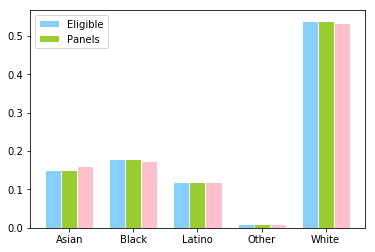

In [78]:
x=np.arange(5)+1
width=0.25
#eligible
plt.bar(x-width,jury.Eligible,width=width,facecolor="lightskyblue",edgecolor="white")
#panel
plt.bar(x+0*width,jury.Eligible,width=width,facecolor="yellowgreen",edgecolor="white")
#random
plt.bar(x+1*width,jury["Random Sample"],width=width,facecolor="pink",edgecolor="white")
#设置名称
plt.xticks(x,jury.Ethnicity)
plt.legend(["Eligible","Panels"])
plt.show()

In [79]:
#计算随机抽取的陪审员和合格陪审员的族裔分布
table_tvd(jury,"Eligible","Random Sample")

0.012422573984858909

In [86]:
#抽取500次绘制tvd的分布
size=1453
tvds=[]
repetitions=500
for i in np.arange(repetitions):
    randomSample=proportions_from_distribution(ch,"height","ch_total",size)
    value,sampleProportion=np.unique(randomSample,return_counts=True )
    tvds=np.append(tvds,np.sum(np.abs(np.divide(sampleProportion,size)-ch["ch_total"])/2))

In [87]:
tvds[0:10]

array([0.0207524 , 0.01029683, 0.02662316, 0.01645004, 0.04673732,
       0.01701055, 0.01108943, 0.01315923, 0.02832294, 0.01608002])

In [65]:
np.quantile(tvds,q=0.95)

0.030241569167240197

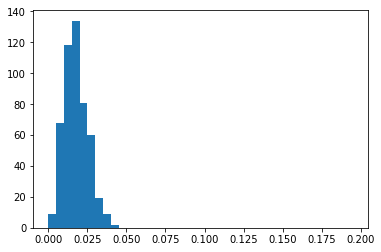

In [68]:
plt.hist(tvds,bins=np.arange(0,0.2,0.005))
plt.show()

In [70]:
(tvds<=0.14).sum()/repetitions

1.0

# 2   

In [11]:
scores.groupby("Section")["Score"].mean()

NameError: name 'scores' is not defined

In [12]:
scores.groupby("Section")["Score"].count()

NameError: name 'scores' is not defined

In [ ]:
#想要经验分布稳定，增加模拟次数——大数定理
randomSample=proportions_from_distribution(scores,"Score","prob",size)
score_mean=np.append(score_mean,np.array(random.Sample).mean())
plt.hist(score_mean)
mean_by_section=scores.groupby("Section")["score"].mean()
observed_statistic=np.array(mean_by_section)[11]
plt.plot([observed_statistic,observed_statistic],[0,250],color="red")
plt.show()

In [ ]:
pvalue=(score_mean<=observed_statistic).mean()
print(pvalue)

In [ ]:
#第一类错误 本来正确，拒绝原假设
#第二类错误 本来拒绝原假设，接受了
#第一类错误更加严重
#一般一类错误越大二类错误越小，一类错误越少二类错误越大

In [2]:
import scipy.stats as stats
import numpy as np

In [8]:
np.random.seed(1010)
x=np.random.normal(3,1,500)
y=np.random.normal(3.2,1,500)
stat,p_value=stats.ttest_1samp(x,3.1)
#不限定方差相等
stat2,p_value2=stats.ttest_ind(x,y,equal_var=False)
print("One sample t-test:stat={},p-value={}".format(stat,p_value))
print("Two sample t-test:stat2={},p-value2={}".format(stat2,p_value2))

One sample t-test:stat=-2.3275531593729157,p-value=0.020334872402761852
Two sample t-test:stat2=-3.481101739488144,p-value2=0.0005209812786136006


In [9]:
stats.binom_test(x=45,n=1000,p=0.06,alternative="less")
#将less更改为 greater 改位two-sided是双边检验

0.023206423480015746

In [10]:
#数字对应的位置为秩,不反应具体的值，但反应大小顺序
x=np.array([1,4,2,8,5,7])
print("sort of x",np.sort(x))
print("rank of x",stats.rankdata(x))

sort of x [1 2 4 5 7 8]
rank of x [1. 3. 2. 6. 4. 5.]


In [11]:
#wilcoxon符号秩检验 
np.random.seed(1010)
x=np.random.normal(3,1,500)
stats.wilcoxon(x-3.1,correction=True)
#适用于不仅仅是正态分布，可以检验股票，t检验只适用于正态分布

WilcoxonResult(statistic=55478.0, pvalue=0.027039583924864934)

In [14]:
np.random.seed(1010)
x=np.random.normal(3,1,500)
y=np.random.normal(3.2,1,500)
#等价代码之一
print(stats.ranksums(x,y))
print("p-value of one sided ranksum test=",\
      stats.ranksums(x,y)[1]/2)
print(stats.mannwhitneyu(x,y,alternative="less"))

RanksumsResult(statistic=-3.2759342262849316, pvalue=0.0010531308405010203)
p-value of one sided ranksum test= 0.0005265654202505102
MannwhitneyuResult(statistic=110040.0, pvalue=0.0005267695906172814)


In [ ]:
#秩和检验

chisq=11.37452118903212,p-value=0.9105966619328724


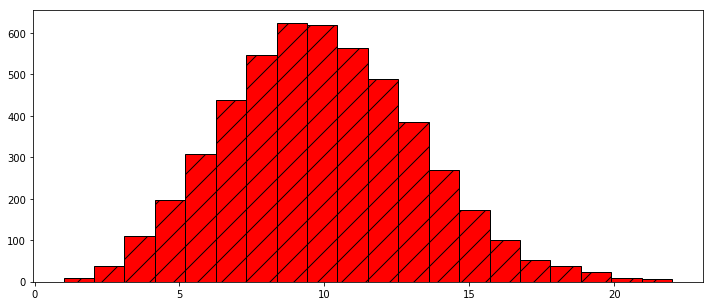

In [22]:
#拟合优度卡方检验
#独立性卡方检验
#假相关 本来是独立的，但维数过高数据量过少
#A1-Ar所占的比例
size=5000
x=stats.poisson.rvs(10,size=size,random_state=1010)
fig=plt.figure(figsize=(12,5))
H=plt.hist(x,20,color="red",edgecolor="black",hatch="/")
E=np.diff(stats.poisson.cdf(H[1],10))*size
n_1=H[0]
chisq,p=stats.chisquare(f_obs=n_1,f_exp=E)
print("chisq={},p-value={}".format(chisq,p))

In [23]:
#独立性检验 P（A) P(B)
x1=x.set_index("血型")
chi2,p,df,exp=stats.chi2_contingency(x1)
print("Pearson Chi2: \n p-value={}, df={}".format(p,df))

AttributeError: 'numpy.ndarray' object has no attribute 'set_index'

In [ ]:
#卡方齐性检验
#简奥斯汀和其他的书 语言风格是否一致

In [5]:
#费雪经济学检验在处理频数很少的时候更精确
x=pd.DataFrame({"药物":["A","B"],"有效":[8,7],"无效":[2,23]})

In [6]:
x3=x.set_index("药物")
oddsratio,pvalue=stats.fisher_exact(x3)
print("Fisher: \n odds ratio = {},p-value={}".format(oddsratio,pvalue))
chi2,p,df,exp=stats.chi2_contingency(x3)
print("Person Chi2：\n p-value={}, df={}".format(p,df))

Fisher: 
 odds ratio = 13.142857142857142,p-value=0.0024285995773062653
Person Chi2：
 p-value=0.004677734981047276, df=1
